**Great! Let's do a complete EDA (Exploratory Data Analysis) on a sample dataset using Python, NumPy, Pandas, and Matplotlib/Seaborn — including:**

✅ Loading data

✅ Univariate analysis

✅ Handling missing/null values

✅ Bivariate/multivariate analysis

✅ Statistical summaries

✅ Visualizations (plots)


**Dataset:** "Titanic" (Passenger Survival Data)

**We'll use the Titanic dataset — it's a classic for EDA:**

##Step-by-Step EDA with Code

##**Step 1:** Import Libraries and Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')

##**Step 2:** Initial Inspection

In [ ]:
print(df.head())           # First 5 rows
print(df.shape)            # Rows & columns
print(df.columns)          # Column names
print(df.info())           # Data types + missing values

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
(891, 15)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
<class 'pandas.core.

## **Step 3:** Handling Missing Values

In [ ]:
# Check missing values
print(df.isnull().sum())

# Drop columns with too many nulls (like 'deck')
df.drop(['deck'], axis=1, inplace=True)

# Fill missing age with median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill embarked with most frequent
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop remaining rows with nulls
df.dropna(inplace=True)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


<ipython-input-3-e844c55c0106>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-3-e844c55c0106>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

##**Step 4:** Univariate Analysis

###**Categorical Variable: sex**

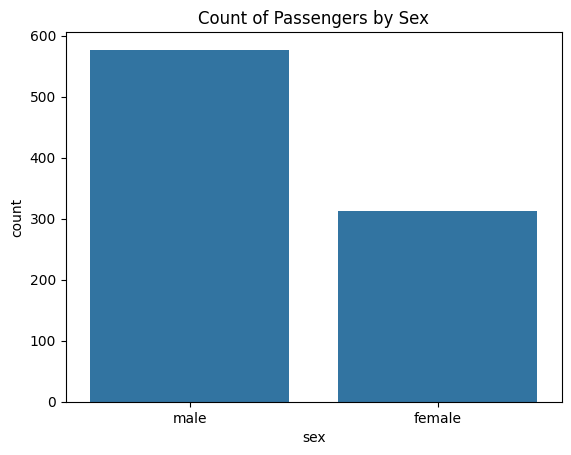

In [ ]:
sns.countplot(x='sex', data=df)
plt.title("Count of Passengers by Sex")
plt.show()


##**Numerical Variable: age**

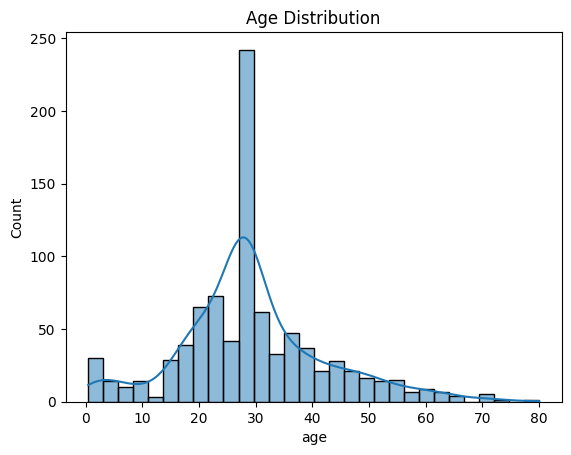

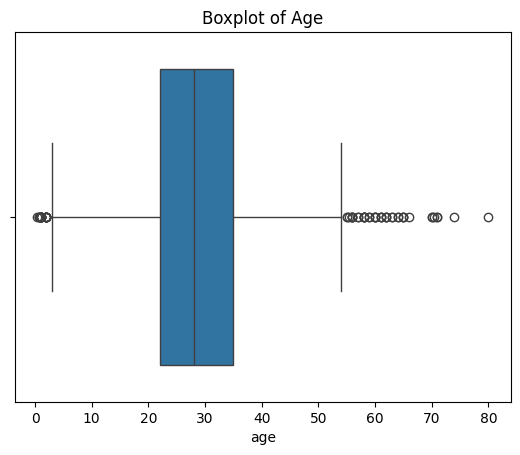

In [ ]:
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

sns.boxplot(x=df['age'])
plt.title("Boxplot of Age")
plt.show()

##**Step 5:** Bivariate Analysis
##**Survival Rate by Gender**

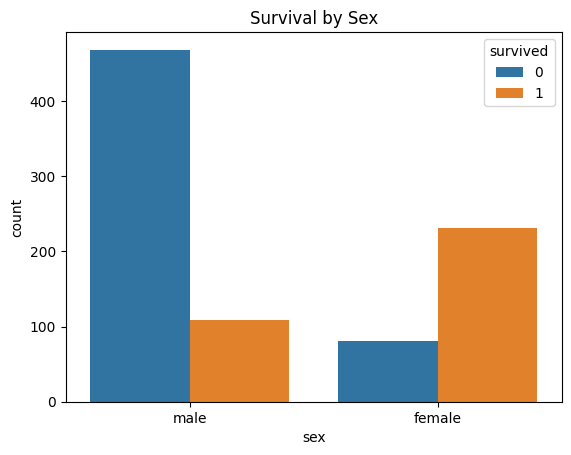

In [ ]:

sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Sex")
plt.show()


##**Age vs Fare**

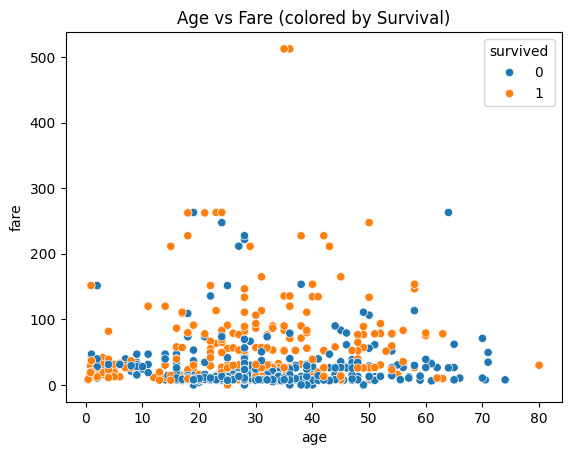

In [ ]:
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title("Age vs Fare (colored by Survival)")
plt.show()

##**Step 6:** Multivariate Analysis
##**Pair Plot**

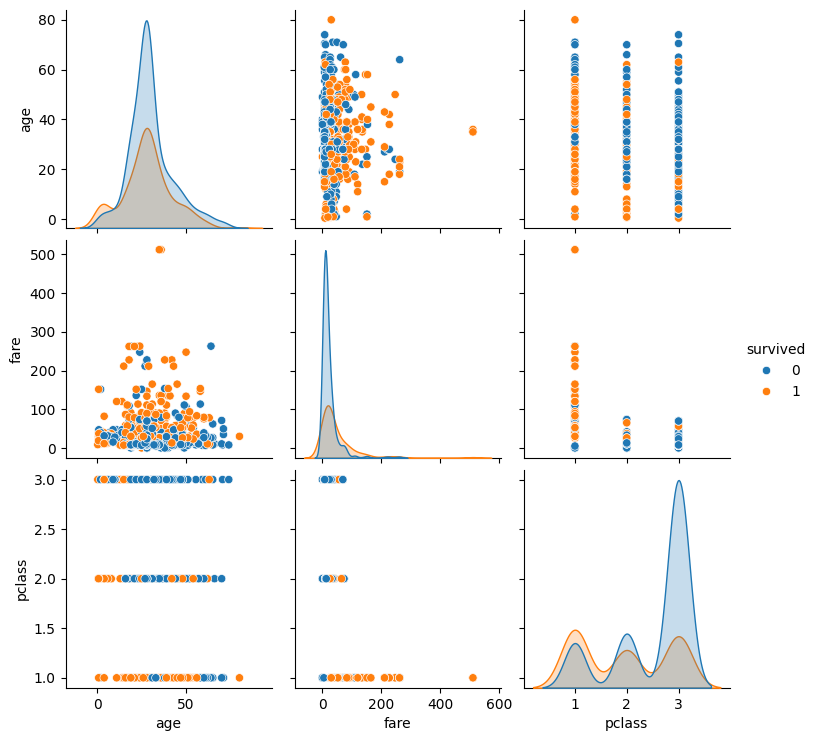

In [ ]:
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']], hue='survived')
plt.show()

##**Correlation Heatmap**

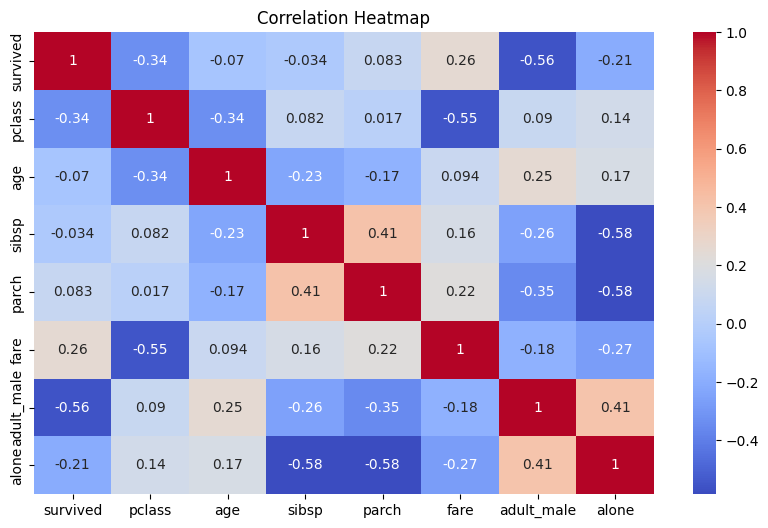

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##**Step 7:** Descriptive Statistics

In [ ]:
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000
mean     0.382452    2.311586   29.315152    0.524184    0.382452   32.096681
std      0.486260    0.834700   12.984932    1.103705    0.806761   49.697504
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
